In [49]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist # metric mình dùng trong bài này.
np.random.seed(11)

In [50]:

means = [[5, 5], [7, 1], [1, 7]]
cov = [[1, 0], [0, 1]]
N = 500
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X2 = np.random.multivariate_normal(means[2], cov, N)

X = np.concatenate((X0, X1, X2), axis = 0) # data sample
K = 3

original_label = np.asarray([0]*N + [1]*N + [2]*N).T # label

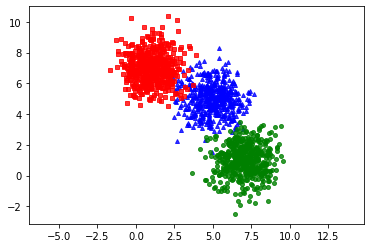

In [51]:
def kmeans_display(X, label):
    K = np.amax(label) + 1
    X0 = X[label == 0, :]
    X1 = X[label == 1, :]
    X2 = X[label == 2, :]
    
    plt.plot(X0[:, 0], X0[:, 1], 'b^', markersize = 4, alpha = .8)
    plt.plot(X1[:, 0], X1[:, 1], 'go', markersize = 4, alpha = .8)
    plt.plot(X2[:, 0], X2[:, 1], 'rs', markersize = 4, alpha = .8)

    plt.axis('equal')
    plt.plot()
    plt.show()
    
kmeans_display(X, original_label)

In [52]:

def kmeans_assign_labels(X, centers):
    '''
    Gán nhãn khi biết điểm center
    '''    
    D = cdist(X, centers)

    return np.argmin(D, axis = 1)

def kmeans_update_centers(X, labels, K):
    '''
    Cập nhật các centers mới dữa trên dữ liệu vừa được gán nhãn.
    '''
    centers = np.zeros((K, X.shape[1]))
    for k in range(K):
        
        Xk = X[labels == k, :]
        
        centers[k,:] = np.mean(Xk, axis = 0)
    return centers

def has_converged(centers, new_centers):
    '''
    Điều kiện dừng
    '''
    return (set([tuple(a) for a in centers]) == 
        set([tuple(a) for a in new_centers]))


In [53]:
'''
Tạo và gán các labels cho dataset
'''
def XRandom(X,k):
    return X[np.random.choice(X.shape[0], k, replace=False)]

def _init_(X):
    import pandas as pd
    x=pd.DataFrame()
    x['x1']=XRandom(X,len(original_label))[:,0]
    x['x2']=XRandom(X,len(original_label))[:,1]
    x['labels']=1
    for i in range(1500):
        x['labels'][i]=np.random.randint(0, 3)
    labels=x['labels'].values
    x1 = x['x1']
    x2 = x['x2']
    X1=pd.concat([x1,x2],axis=1).values
    return (labels,X1)


In [54]:
def kmeans(X, K , labels):
    new_labels = []
    it = 0 
    centers = kmeans_update_centers(X, labels, K) 
    
    while True:
        
       
        kmeans_display(Y, labels)
        new_labels.append(kmeans_assign_labels(X, centers))   
        labels=new_labels[-1]
        new_centers = kmeans_update_centers(X, labels, K)  

        if has_converged(centers, new_centers):    
            break
            
        print('with loop', it)     
        print(centers)    
        
        centers=new_centers 
        it += 1
    return (centers, labels, it)




<ipython-input-53-6da923b81ab9>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['labels'][i]=np.random.randint(0, 3)


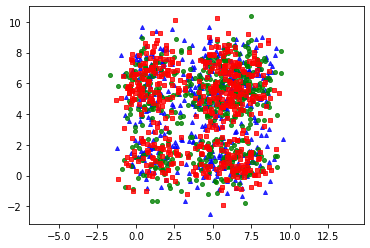

with loop 0
[[4.43407064 4.40790383]
 [4.40328691 4.26655106]
 [4.1667072  4.38327189]]


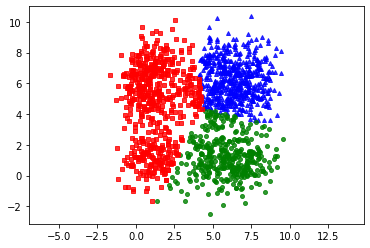

with loop 1
[[6.38790817 6.24264181]
 [5.85248368 1.26500015]
 [1.29721692 4.63462157]]


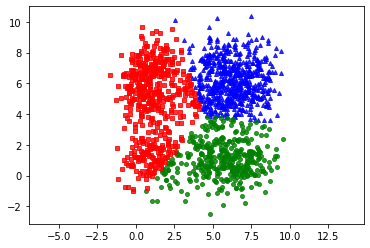

with loop 2
[[6.21889448 6.17511427]
 [5.63423299 1.08610953]
 [1.10162544 4.74102061]]


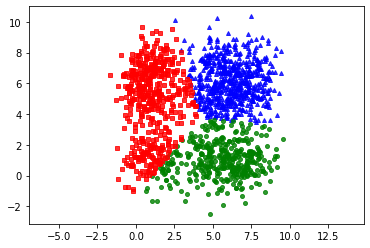

with loop 3
[[6.17458258 6.13774777]
 [5.53561313 1.03677824]
 [1.03156911 4.80075434]]


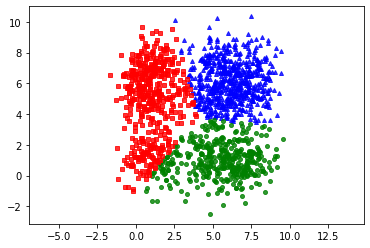

with loop 4
[[6.14954004 6.12998802]
 [5.43535953 1.03430854]
 [0.97920847 4.87318011]]


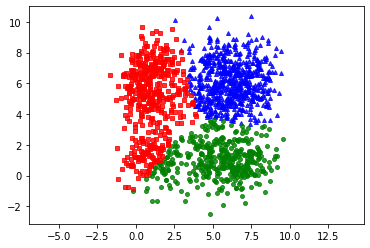

with loop 5
[[6.15365794 6.1173758 ]
 [5.33093125 1.01753058]
 [0.96788156 4.96652119]]


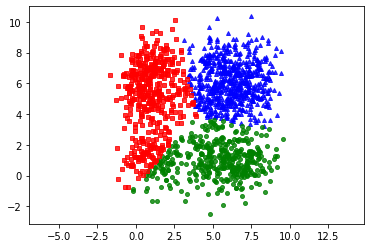

with loop 6
[[6.17240965 6.10383757]
 [5.24702937 1.00860075]
 [0.9757176  5.0589199 ]]


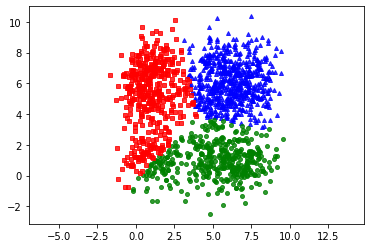

with loop 7
[[6.17999326 6.0990242 ]
 [5.14020599 0.99483163]
 [0.98216517 5.160444  ]]


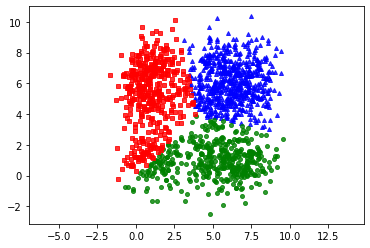

with loop 8
[[6.18837239 6.09344376]
 [5.05142028 0.99271721]
 [0.98330591 5.24637604]]


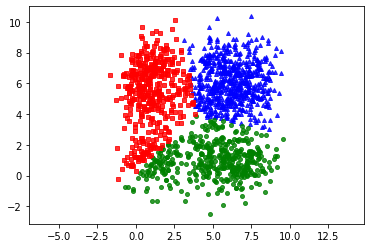

with loop 9
[[6.19711103 6.09309698]
 [5.00012634 0.9973897 ]
 [0.99114337 5.30465611]]


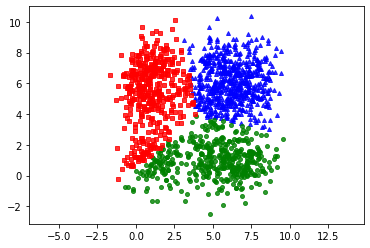

with loop 10
[[6.19711103 6.09309698]
 [4.98242254 0.99872544]
 [0.99090233 5.32317218]]


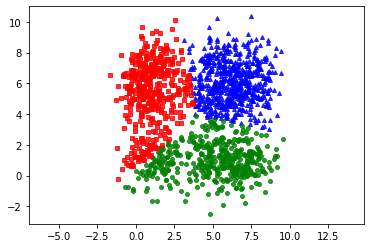

with loop 11
[[6.19333168 6.0897194 ]
 [4.97475405 1.00056608]
 [0.98297827 5.33437263]]


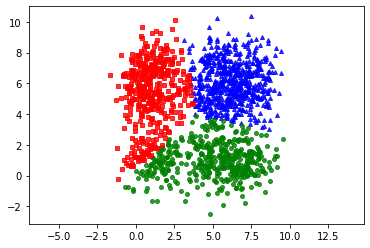

with loop 12
[[6.18936691 6.08757879]
 [4.9684505  1.00365784]
 [0.97387397 5.34258177]]


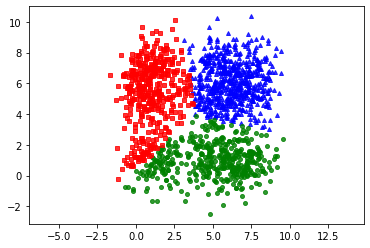

with loop 13
[[6.18853232 6.08346443]
 [4.96688584 0.99803133]
 [0.97387397 5.34258177]]


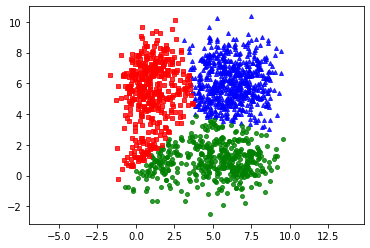

Centers found by our algorithm:
[[6.18853232 6.08346443]
 [4.95797844 0.99876812]
 [0.97388895 5.35195965]]
[2 0 0 ... 2 0 2]


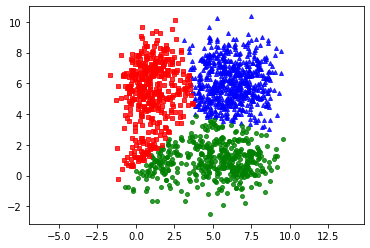

In [55]:
'''
Khởi tạo labels và dataset
'''
labels , Y = _init_(X)
(Centers,Labels, it) = kmeans(Y, K,labels)
print('Centers found by our algorithm:')
print(Centers)
print(Labels)
kmeans_display(Y, Labels)


Centers found by scikit-learn:
[[0.98297827 5.33437263]
 [4.97475405 1.00056608]
 [6.19333168 6.0897194 ]]


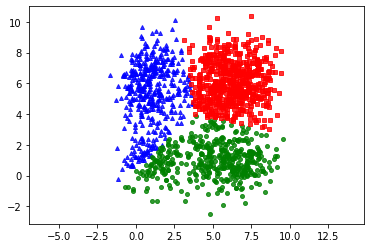

In [56]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(Y)
print('Centers found by scikit-learn:')
print(kmeans.cluster_centers_)
pred_label = kmeans.predict(Y)
kmeans_display(Y, pred_label)

In [4]:
# Tim hiểu về  Within-cluster-variation
'''
Thông thường , ta sử dụng Elbow với đường biểu diễn là 1 đường gâps khúc, K={3,4} là số thích hợp để chia cụm
Tuy nhiên, ở một số trường, đường biểu diễn là 1 đường cong thì việc chọn số K bằng Elbow là không ổn,
Không có một cách cụ thể để chọn số K.
Thông thường, số nhóm K sẽ được chọn thủ công bởi người hoặc mục đích sử dụng K-means là gì để chọn số nhóm K
'''

'\nThông thường , ta sử dụng Elbow với đường biểu diễn là 1 đường gâps khúc, K={3,4} là số thích hợp để chia cụm\nTuy nhiên, ở một số trường, đường biểu diễn là 1 đường cong thì việc chọn số K bằng Elbow là không ổn,\nKhông có một cách cụ thể để chọn số K.\nThông thường, số nhóm K sẽ được chọn thủ công bởi người hoặc mục đích sử dụng K-means là gì để chọn số nhóm K\n'